In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats 

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

from sklearn.preprocessing import LabelEncoder #Encodes Categorical Data into Numerical
from sklearn.model_selection import train_test_split #For spliting data into training and testing sets
from sklearn.linear_model import LinearRegression #Linear Regression model


%matplotlib inline

import os
for dirname, _, filenames in os.walk('/data_analysis/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        

/data_analysis/input/spotify_dataset.csv


In [2]:
df=pd.read_csv("/data_analysis/input/spotify_dataset.csv")
cols = list(df.columns.values)
df = df.loc[:, ~df.columns.isin(['Index'])]
df

,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,Release Date,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,1,8,2021-07-23--2021-07-30,Beggin',"48,633,449",Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",2017-12-08,...,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B
1,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),"47,248,719",The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,['australian hip hop'],2021-07-09,...,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db
2,1,11,2021-06-25--2021-07-02,good 4 u,"40,162,559",Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,['pop'],2021-05-21,...,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688,A
3,3,5,2021-07-02--2021-07-09,Bad Habits,"37,799,456",Ed Sheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,"['pop', 'uk pop']",2021-06-25,...,0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591,B
4,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),"33,948,454",Lil Nas X,5473565,27NovPIUIRrOZoCHxABJwK,"['lgbtq+ hip hop', 'pop rap']",2021-07-23,...,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894,D#/Eb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1551,195,1,2019-12-27--2020-01-03,New Rules,"4,630,675",Dua Lipa,27167675,2ekn2ttSfGqwhhate0LSR0,"['dance pop', 'pop', 'uk pop']",2017-06-02,...,0.762,0.7,-6.021,0.0694,0.00261,0.153,116.073,209320,0.608,A
1552,196,1,2019-12-27--2020-01-03,Cheirosa - Ao Vivo,"4,623,030",Jorge & Mateus,15019109,2PWjKmjyTZeDpmOUa3a5da,"['sertanejo', 'sertanejo universitario']",2019-10-11,...,0.528,0.87,-3.123,0.0851,0.24,0.333,152.37,181930,0.714,B
1553,197,1,2019-12-27--2020-01-03,Havana (feat. Young Thug),"4,620,876",Camila Cabello,22698747,1rfofaqEpACxVEHIZBJe6W,"['dance pop', 'electropop', 'pop', 'post-teen ...",2018-01-12,...,0.765,0.523,-4.333,0.03,0.184,0.132,104.988,217307,0.394,D
1554,198,1,2019-12-27--2020-01-03,Surtada - Remix Brega Funk,"4,607,385","Dadá Boladão, Tati Zaqui, OIK",208630,5F8ffc8KWKNawllr5WsW0r,"['brega funk', 'funk carioca']",2019-09-25,...,0.832,0.55,-7.026,0.0587,0.249,0.182,154.064,152784,0.881,F


In [3]:
df1 = df
df1['Genre']=df1['Genre'].astype(str)
df1["Genre"][df1["Genre"] == "[]"] = np.nan
df1["Genre"] = df1["Genre"].fillna(0)
df1.Genre=df1.Genre.str.replace("[", "")
df1.Genre=df1.Genre.str.replace("]", "")
df1.Genre=df1.Genre.str.replace("'", "")
df1["Genre"] = df1["Genre"].str.split(",")
df1=df1.explode('Genre')
df1["Genre"] = df1["Genre"].str.strip() 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


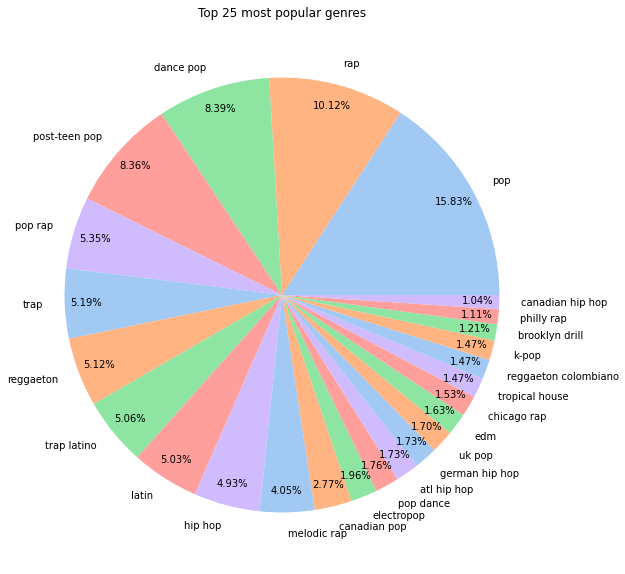

In [4]:
fig = plt.figure(figsize = (10, 10))
ax = fig.subplots()
colors = sns.color_palette('pastel')[0:5]
df1.Genre.value_counts()[:25].plot(ax=ax, kind = "pie", autopct='%.2f%%', pctdistance=0.9, colors = colors)
ax.set_ylabel("")
ax.set_title("Top 25 most popular genres")
plt.show()

In [5]:
df.Streams=df.Streams.str.replace(",", "") #prepare streams in order to make it suitable to be transformed into int

df = df[df.Popularity != ' '] #delete the lines where popularity is empty

df=df.fillna('')
df=df.replace(' ', '')

df[['Highest Charting Position', 'Number of Times Charted', 'Streams', 'Popularity', 'Danceability', 'Energy', 'Loudness', 'Speechiness',
       'Acousticness', 'Liveness', 'Tempo', 'Duration (ms)', 'Valence', 'Artist Followers',
       ]] = df[['Highest Charting Position', 'Number of Times Charted', 'Streams','Popularity', 'Danceability', 'Energy', 'Loudness', 'Speechiness',
       'Acousticness', 'Liveness', 'Tempo', 'Duration (ms)', 'Valence', 'Artist Followers',
       ]].apply(pd.to_numeric)

df = df.sort_values(by=['Popularity', 'Streams'], ascending = False)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1545 entries, 0 to 1075
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Highest Charting Position  1545 non-null   int64  
 1   Number of Times Charted    1545 non-null   int64  
 2   Week of Highest Charting   1545 non-null   object 
 3   Song Name                  1545 non-null   object 
 4   Streams                    1545 non-null   int64  
 5   Artist                     1545 non-null   object 
 6   Artist Followers           1545 non-null   int64  
 7   Song ID                    1545 non-null   object 
 8   Genre                      1545 non-null   object 
 9   Release Date               1545 non-null   object 
 10  Weeks Charted              1545 non-null   object 
 11  Popularity                 1545 non-null   int64  
 12  Danceability               1545 non-null   float64
 13  Energy                     1545 non-null   float

In [7]:
df_numbercharted=df.groupby('Artist').sum().sort_values('Number of Times Charted', ascending=False)
df_numbercharted=df_numbercharted.reset_index()
df_numbercharted

,Artist,Highest Charting Position,Number of Times Charted,Streams,Artist Followers,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence
0,Billie Eilish,1136,432,97575714,434666567,707,10.786,5.761,-207.037,2.5197,12.22100,2.8004,2217.721,3783701,5.1466
1,Juice WRLD,1755,431,166703004,572980020,2210,18.599,17.872,-212.933,3.9328,8.43735,5.8540,3856.514,5333179,11.9614
2,Harry Styles,139,364,32082208,80578392,415,2.814,3.313,-27.808,0.2124,1.23390,0.7980,546.299,1002386,1.7092
3,Ed Sheeran,657,314,80580568,667819408,670,6.563,5.089,-55.129,0.5589,2.93310,1.4298,907.146,2076469,4.8130
4,Pop Smoke,2420,308,173634217,198548005,1970,20.081,18.583,-196.316,6.2924,6.64445,5.8263,3595.681,5186370,13.9520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,"Kane Brown, blackbear",187,1,5173178,3507622,80,0.434,0.889,-5.684,0.0509,0.39500,0.2730,113.326,153338,0.8450
708,Kehlani,177,1,4603243,4894562,68,0.574,0.791,-3.752,0.1100,0.41900,0.0982,119.537,167810,0.6120
709,Kontra K,129,1,5867111,1818624,62,0.751,0.783,-5.926,0.2200,0.07150,0.1140,94.003,189739,0.3790
710,"Kygo, Kim Petras",114,1,5867930,7593792,66,0.526,0.633,-7.002,0.1340,0.37200,0.1290,171.044,203947,0.2720


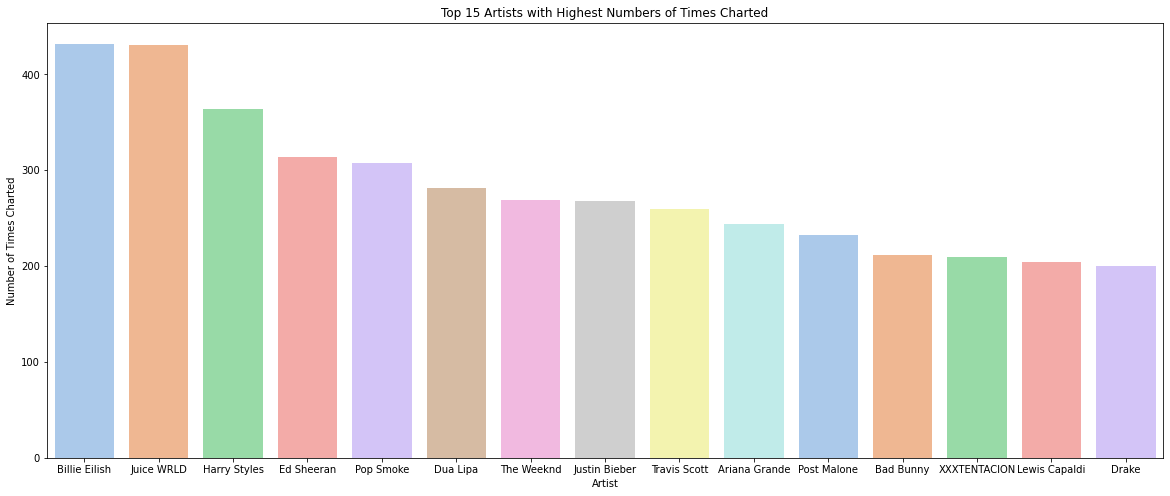

In [8]:
plt.figure(figsize=(20,8))
plt.title("Top 15 Artists with Highest Numbers of Times Charted")
sns.barplot(x='Artist',y='Number of Times Charted',data=df_numbercharted.head(15), palette = 'pastel')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

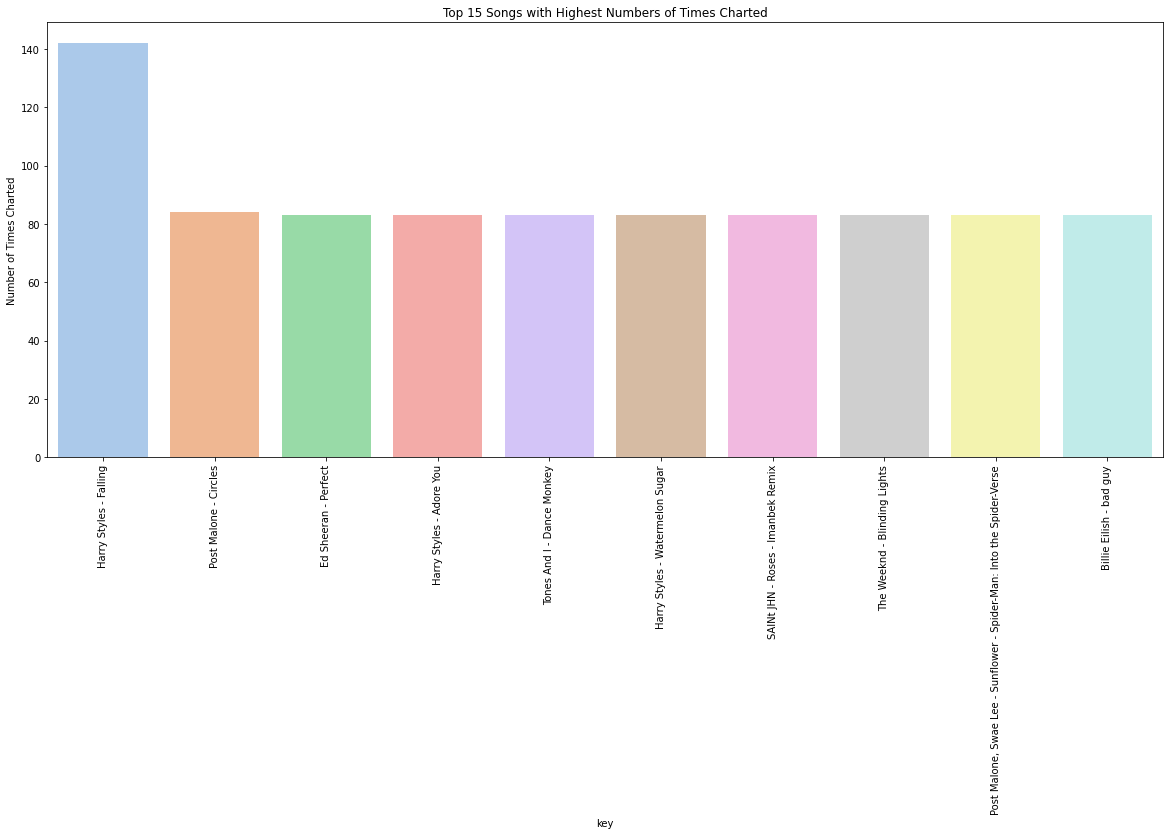

In [9]:
df_numbercharted2=df.groupby('Song Name').sum().sort_values('Number of Times Charted', ascending=False)
df_numbercharted2=df_numbercharted2.reset_index()

df_numbercharted2 = pd.merge(df_numbercharted2, df[['Artist', 'Song Name']] , left_on ='Song Name', right_on ='Song Name')
df_numbercharted2["key"] = df_numbercharted2[["Artist", "Song Name"]].apply(" - ".join, axis=1)


plt.figure(figsize=(20,8))
plt.title("Top 15 Songs with Highest Numbers of Times Charted")
sns.barplot(x='key',y='Number of Times Charted',data=df_numbercharted2.head(10), palette = 'pastel')
plt.xticks(rotation = 90)

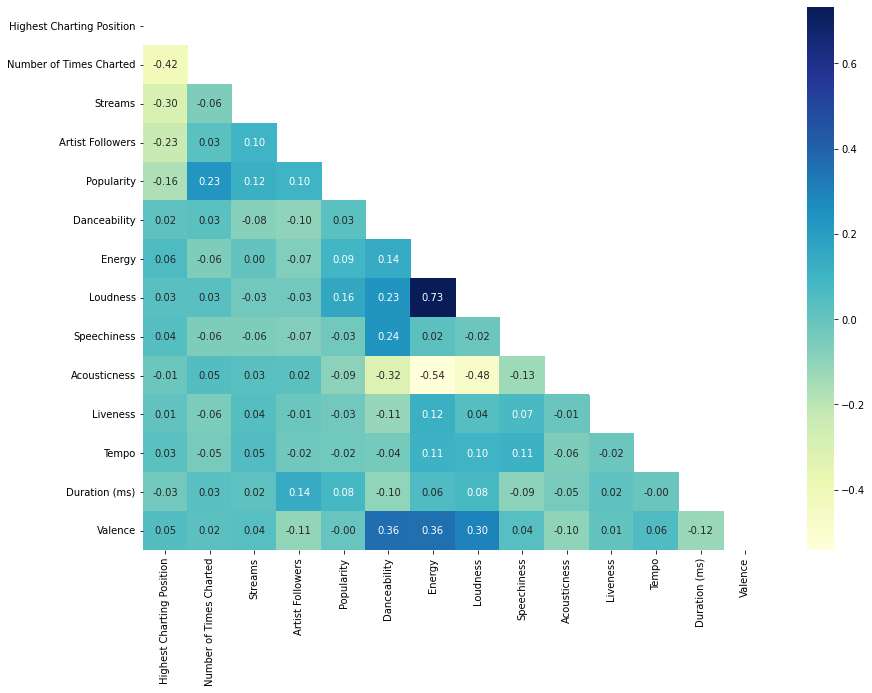

In [10]:
f,ax = plt.subplots(figsize=(14,10))
sns.heatmap(df.corr(),annot = True,fmt = ".2f",ax = ax, cmap="YlGnBu", mask=np.triu(df.corr(), k=0))
plt.show()

In [11]:
df['Release Year'] = pd.DatetimeIndex(df['Release Date']).year
years = df['Release Year'].unique()
years.sort()
print(years)

[1942 1957 1959 1962 1963 1964 1965 1970 1973 1975 1977 1978 1979 1980
 1981 1983 1984 1985 1988 1990 1991 1994 1995 1998 1999 2000 2002 2004
 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018
 2019 2020 2021]


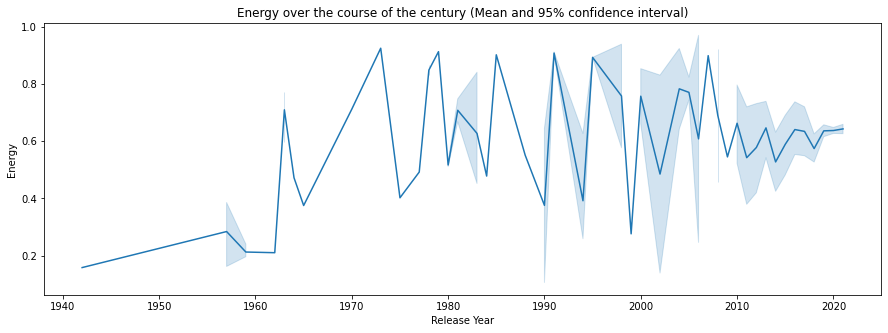

In [12]:
plt.figure(figsize=(15, 5))
plt.title('Energy over the course of the century (Mean and 95% confidence interval)')
sns.lineplot(x="Release Year", y="Energy", data=df)

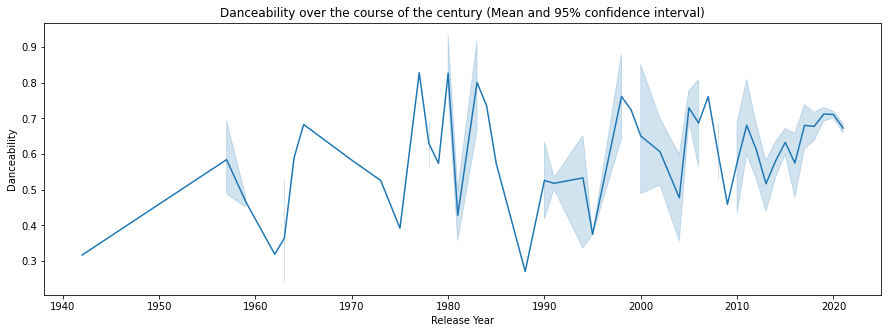

In [13]:
plt.figure(figsize=(15, 5))
plt.title('Danceability over the course of the century (Mean and 95% confidence interval)')
sns.lineplot(x="Release Year", y="Danceability", data=df)

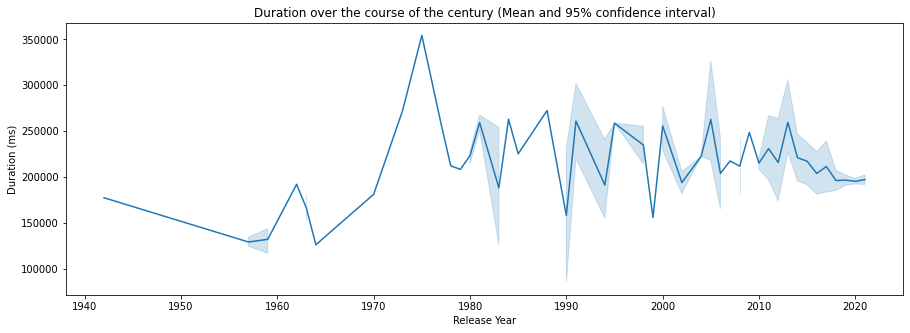

In [14]:
plt.figure(figsize=(15, 5))
plt.title('Duration over the course of the century (Mean and 95% confidence interval)')
sns.lineplot(x="Release Year", y="Duration (ms)", data=df)

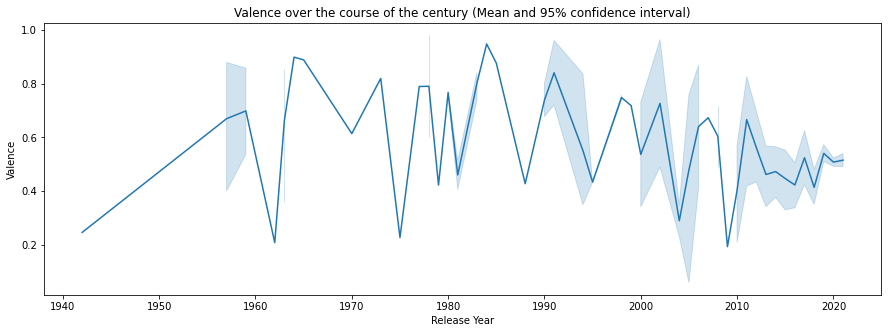

In [15]:
plt.figure(figsize=(15, 5))
plt.title('Valence over the course of the century (Mean and 95% confidence interval)')
sns.lineplot(x="Release Year", y="Valence", data=df)



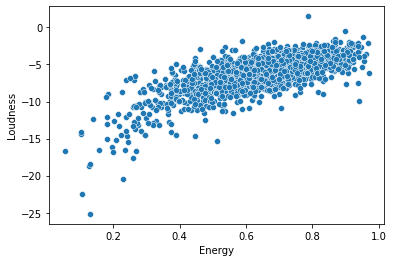

In [16]:
sns.scatterplot(x="Energy", y="Loudness", data=df)


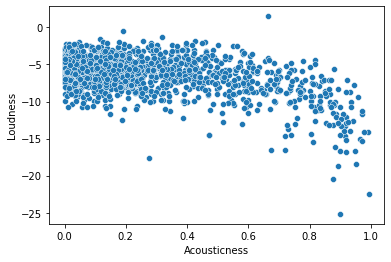

In [17]:
sns.scatterplot(x="Acousticness", y="Loudness", data=df)


In [18]:
dfyear=df.groupby('Release Year').sum().sort_values('Number of Times Charted', ascending=False)
dfyear=dfyear.reset_index()

In [19]:
dfyear

,Release Year,Highest Charting Position,Number of Times Charted,Streams,Artist Followers,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence
0,2020,65118,6966,4667385942,13279309677,54016,556.859,498.952,-4959.830,108.6284,179.676015,142.7061,97198.678,152982860,397.9063
1,2019,16679,3696,931243545,2170986405,13557,128.920,115.136,-1053.583,21.7077,42.181240,31.5150,22059.115,35604427,97.8843
2,2021,33262,2890,2952932265,4506882635,27672,266.477,254.573,-2458.116,47.4944,99.085780,69.3591,48461.695,78119865,204.0867
3,2018,4774,1116,222988147,723658671,3364,29.140,24.683,-277.908,4.3252,14.166120,6.3445,5022.756,8435728,17.8139
4,2017,2088,409,135510916,448257185,1259,10.890,10.148,-98.086,1.2901,4.257300,3.2962,1942.546,3384279,8.3920
5,2013,1435,236,74195773,110364689,890,6.200,7.758,-70.104,0.5434,3.195890,2.0640,1384.118,3115012,5.5460
6,2016,1434,207,75932486,237266570,967,7.475,8.328,-74.212,1.0984,4.704270,4.3517,1447.434,2651698,5.5010
7,2015,1192,197,53652044,168629967,775,6.329,5.889,-70.502,0.5192,1.742730,1.3743,1134.555,2171906,4.4720
8,2014,1384,167,85269932,307422068,820,6.969,6.329,-89.924,0.8627,5.542900,2.0661,1387.606,2653343,5.6760
9,1975,81,81,5756583,35888760,74,0.392,0.402,-9.961,0.0536,0.288000,0.2430,143.883,354320,0.2280


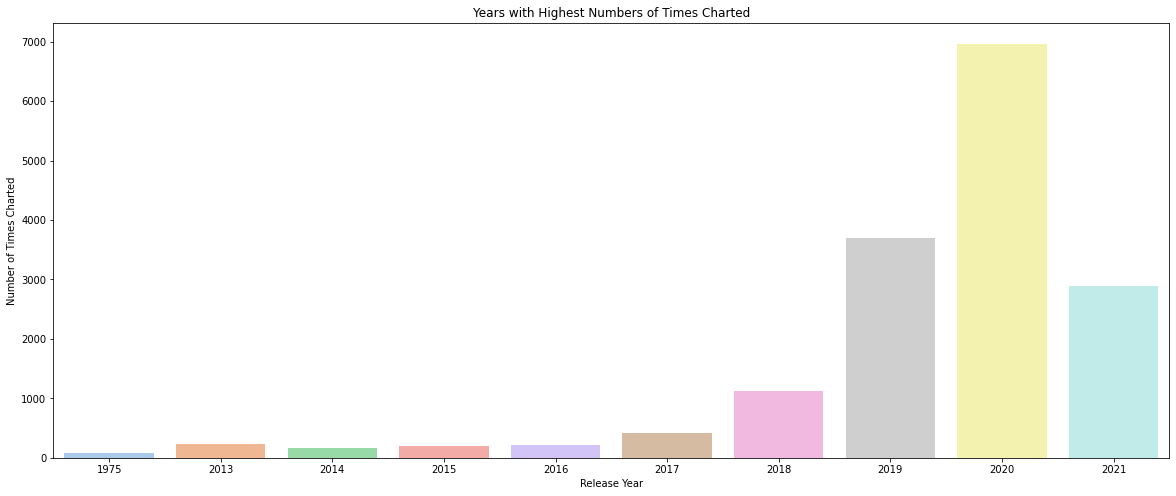

In [20]:
plt.figure(figsize=(20,8))
plt.title("Years with Highest Numbers of Times Charted")
sns.barplot(x='Release Year',y='Number of Times Charted',data=dfyear.head(10), palette = 'pastel')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

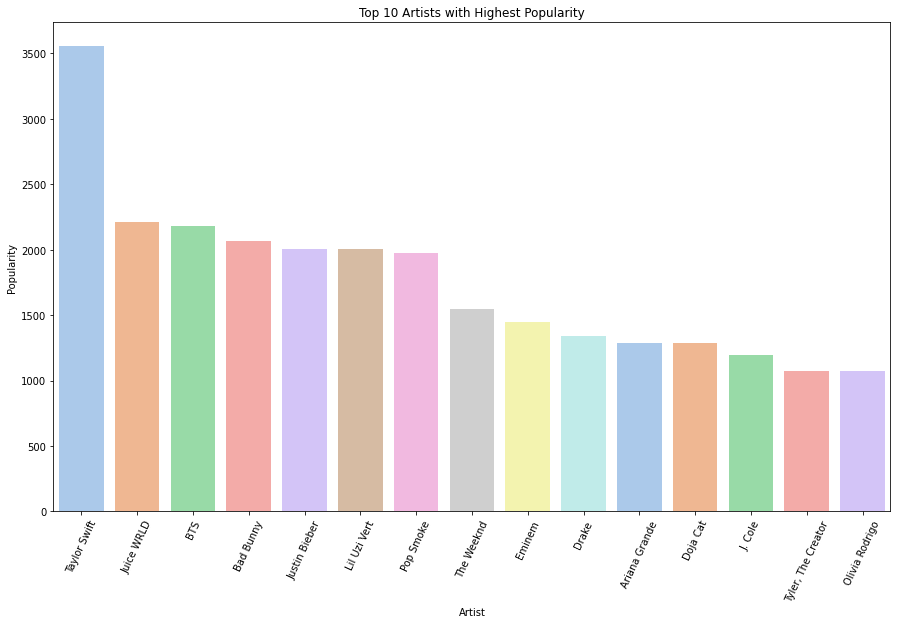

In [21]:
artistspop=df.groupby('Artist').sum().sort_values('Popularity', ascending=False)
artistspop=artistspop.reset_index()

plt.figure(figsize=(15,9))
plt.title("Top 10 Artists with Highest Popularity")
sns.barplot(x='Artist',y='Popularity',data=artistspop.head(15), palette = 'pastel')
plt.xticks(rotation = 65)


In [22]:
df1 = df

In [23]:
df1[['Week of Highest Charting_start','Week of Highest Charting_end']] = df1['Week of Highest Charting'].str.split('--', expand=True)

In [24]:
df1['Week of Highest Charting_start'] = pd.to_datetime(df1['Week of Highest Charting_start'], yearfirst=True)
df1['Week of Highest Charting_end'] = pd.to_datetime(df1['Week of Highest Charting_end'], yearfirst=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1545 entries, 0 to 1075
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Highest Charting Position       1545 non-null   int64         
 1   Number of Times Charted         1545 non-null   int64         
 2   Week of Highest Charting        1545 non-null   object        
 3   Song Name                       1545 non-null   object        
 4   Streams                         1545 non-null   int64         
 5   Artist                          1545 non-null   object        
 6   Artist Followers                1545 non-null   int64         
 7   Song ID                         1545 non-null   object        
 8   Genre                           1545 non-null   object        
 9   Release Date                    1545 non-null   object        
 10  Weeks Charted                   1545 non-null   object        
 11  Popu

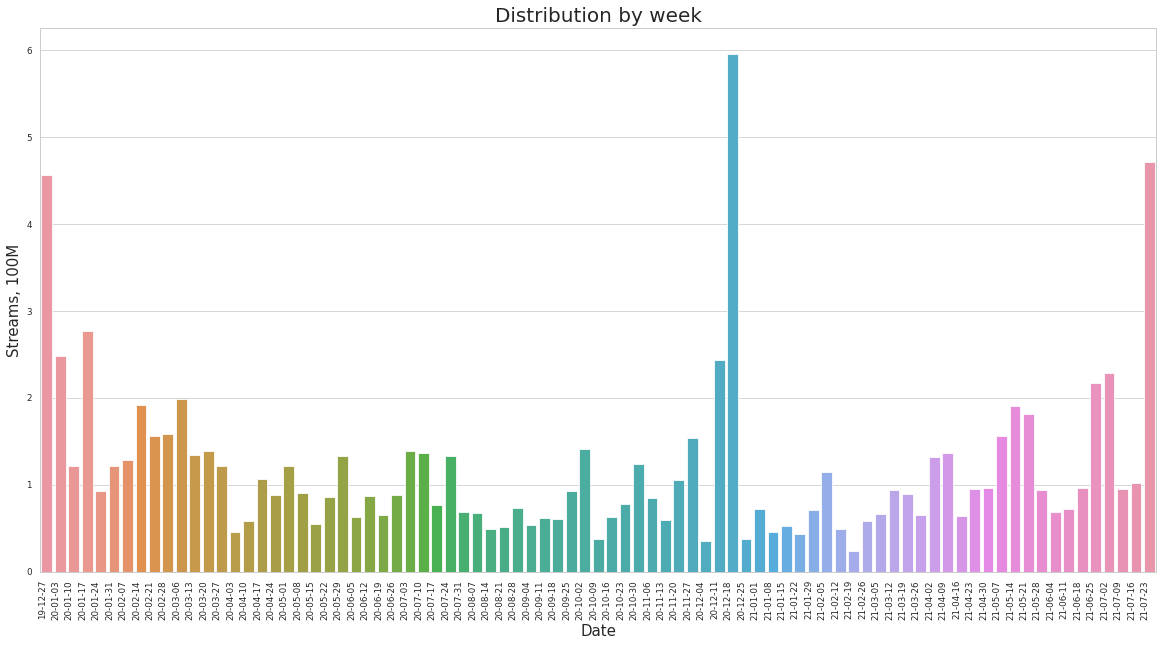

In [25]:
sns.set_theme(style="whitegrid")
sns.set_context("paper")

y = df1.groupby(by=['Week of Highest Charting_start'])['Streams'].sum()
x = y.index

fig, ax = plt.subplots(figsize=(20,10))
ax = sns.barplot(x=x, y=y/100000000, data=y, order=y)
ax.axes.set_title('Distribution by week',size=20)
x_dates = x.strftime('%y-%m-%d').sort_values()
ax.set_ylabel('Streams, 100M', size=15)
ax.set_xlabel('Date', size=15)
ax.set_xticklabels(labels=x_dates, rotation=90, ha='right')
fig.show()

In [26]:
list(df.columns)

['Highest Charting Position',
 'Number of Times Charted',
 'Week of Highest Charting',
 'Song Name',
 'Streams',
 'Artist',
 'Artist Followers',
 'Song ID',
 'Genre',
 'Release Date',
 'Weeks Charted',
 'Popularity',
 'Danceability',
 'Energy',
 'Loudness',
 'Speechiness',
 'Acousticness',
 'Liveness',
 'Tempo',
 'Duration (ms)',
 'Valence',
 'Chord',
 'Release Year',
 'Week of Highest Charting_start',
 'Week of Highest Charting_end']

In [27]:
lr_data = df[[
'Streams',
'Artist Followers',
'Genre',
'Danceability',
'Energy',
'Loudness',
'Speechiness',
'Acousticness',
'Liveness',
'Tempo',
'Duration (ms)',
'Valence']]
lr_data.head()

,Streams,Artist Followers,Genre,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence
0,48633449,3377762,"[indie rock italiano, italian pop]",0.714,0.800,-4.808,0.0504,0.1270,0.3590,134.002,211560,0.589
1,47248719,2230022,[australian hip hop],0.591,0.764,-5.484,0.0483,0.0383,0.1030,169.928,141806,0.478
2,40162559,6266514,[pop],0.563,0.664,-5.044,0.1540,0.3350,0.0849,166.928,178147,0.688
3,37799456,83293380,"[pop, uk pop]",0.808,0.897,-3.712,0.0348,0.0469,0.3640,126.026,231041,0.591
5,30071134,5473565,"[lgbtq+ hip hop, pop rap]",0.610,0.508,-6.682,0.1520,0.2970,0.3840,178.818,137876,0.758


In [28]:
lr_data['Genre'] = lr_data['Genre'].astype(str)
lr_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1545 entries, 0 to 1075
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Streams           1545 non-null   int64  
 1   Artist Followers  1545 non-null   int64  
 2   Genre             1545 non-null   object 
 3   Danceability      1545 non-null   float64
 4   Energy            1545 non-null   float64
 5   Loudness          1545 non-null   float64
 6   Speechiness       1545 non-null   float64
 7   Acousticness      1545 non-null   float64
 8   Liveness          1545 non-null   float64
 9   Tempo             1545 non-null   float64
 10  Duration (ms)     1545 non-null   int64  
 11  Valence           1545 non-null   float64
dtypes: float64(8), int64(3), object(1)
memory usage: 189.2+ KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [29]:
genre_encoder = LabelEncoder()
lr_data['Genre'] = genre_encoder.fit_transform(lr_data['Genre'])
lr_data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Streams,Artist Followers,Genre,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence
0,48633449,3377762,277,0.714,0.800,-4.808,0.0504,0.1270,0.3590,134.002,211560,0.589
1,47248719,2230022,64,0.591,0.764,-5.484,0.0483,0.0383,0.1030,169.928,141806,0.478
2,40162559,6266514,365,0.563,0.664,-5.044,0.1540,0.3350,0.0849,166.928,178147,0.688
3,37799456,83293380,364,0.808,0.897,-3.712,0.0348,0.0469,0.3640,126.026,231041,0.591
5,30071134,5473565,313,0.610,0.508,-6.682,0.1520,0.2970,0.3840,178.818,137876,0.758


In [30]:
cols = list(lr_data.columns)

In [31]:
X = lr_data[cols].drop(['Streams'],axis = 1)
y = lr_data['Streams']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 50)

del X, y

print(f"No. of training examples: {X_train.shape[0]}")
print(f"No. of testing examples: {X_test.shape[0]}")


No. of training examples: 1236
No. of testing examples: 309


In [32]:
X_train.shape, y_train.shape, X_test.shape

((1236, 11), (1236,), (309, 11))

In [33]:
#Linear Regression Modelling and Training
linear_model=LinearRegression()
linear_model.fit(X_train,y_train)
print(linear_model.score(X_train,y_train))

#testing the model and Displaying the output
linear_predict=linear_model.predict(X_test)
l_output=pd.DataFrame({'Id':X_test.index,'Predicted Streams':linear_predict,'Actual Stream':y_test})
print(l_output)

0.028231076144760503
        Id  Predicted Streams  Actual Stream
1370  1370       5.274503e+06        5192813
1317  1317       5.283342e+06        4988839
1197  1197       6.180930e+06        9904749
650    650       6.167123e+06        5209372
918    918       6.607286e+06        4642057
...    ...                ...            ...
1071  1071       5.417058e+06        4430642
1235  1235       6.421621e+06        4618744
1464  1464       6.628241e+06        4896939
1333  1333       5.743404e+06        8219307
274    274       6.384190e+06        6893939

[309 rows x 3 columns]


In [34]:
print(f'Intercept: {linear_model.intercept_}')
print(f'Coeff: {linear_model.coef_}')
print(f'Score train: {linear_model.score(X_train, y_train)}')
print(f'Score test: {linear_model.score(X_test, y_test)}')

Intercept: 5576605.9007355645
Coeff: [ 1.74523791e-02  4.06068859e+02 -2.03590218e+06 -1.72768450e+04
 -7.79917258e+04 -1.40175080e+06 -1.52745973e+05  1.14603681e+06
  6.11689047e+03 -6.55520724e-01  1.26241795e+06]
Score train: 0.028231076144760503
Score test: 0.020731366403550333


In [35]:
import statsmodels.api as sm
from scipy import stats

X2 = sm.add_constant(X_train)
lr = sm.OLS(y_train, X2)
lr2 = lr.fit()
print(lr2.summary())

#The only variable seams significant in order to predict Streams seams Artist Followers with a significance level of 1%.
# Linear Regression results not a good model to predict numenbers of Streams, given the low R-squared and Adj. R-squared.
# a ML model could provide a better forcast for Streams or popularity
# (see the data_ML for a ML application example)

                            OLS Regression Results                            
Dep. Variable:                Streams   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     3.233
Date:                Sat, 05 Nov 2022   Prob (F-statistic):           0.000231
Time:                        15:57:16   Log-Likelihood:                -20294.
No. Observations:                1236   AIC:                         4.061e+04
Df Residuals:                    1224   BIC:                         4.067e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             5.577e+06   1.31e+06  

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
